In [1]:
import psycopg2
import pandas as pd
import pandas.io.sql as pd_sql
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import yellowbrick as yb

from yellowbrick.features import RadViz
from sklearn.metrics import accuracy_score
from yellowbrick.features import Rank2D
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.features import FeatureImportances
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LogisticRegression

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
def connectDB(DB):
    # connect to the PostgreSQL server
    return psycopg2.connect(
        database=DB,
        user="postgres",
        password="Georgetown16",
        host="database-1.c5vispb5ezxg.us-east-1.rds.amazonaws.com",
        port='5432')

def disconnectDB():
    cur.close()
    conn.close()

In [3]:
conn = connectDB("Dataset")

# extract everything from 'table_name' into a dataframe
df = pd_sql.read_sql(f"select * from public.\"featureSTG\" ", con=conn)
#code to be able to view all the columns in pandas dataframe
pd.set_option('display.max_columns', 50) 
              

# Feature Analysis

In [4]:
df = df[['code_module', 'module_domain', 'module_presentation_length','year','term', 'num_of_prev_attempts',
                    'final_result', 'date_registration', 'disability', 'gender', 'age_band', 'region', 'highest_education', 
                    'imd_band', 'studied_credits', 'b4_sum_clicks', 'half_sum_clicks', 'std_half_score']]

In [5]:
feature_list = df

In [6]:
feature_list = df.loc[(df.year == 0)&(df.module_domain==1)]

In [7]:
#feature_list = feature_list.drop(['level_0', 'index', 'id_student',])]

#remove null values
feature_list = feature_list.dropna()

In [8]:
#save dataset to desktop in CSV
#df_temp.to_csv('dataset_not_mapped.csv')

In [9]:
feature_list.head()

,code_module,module_domain,module_presentation_length,year,term,num_of_prev_attempts,final_result,date_registration,disability,gender,age_band,region,highest_education,imd_band,studied_credits,b4_sum_clicks,half_sum_clicks,std_half_score
2,3.0,1,261,0,0,0,0,-137.0,0,0,2,2,3,3.0,90,81.0,565.0,58.166667
32,3.0,1,261,0,0,0,0,-74.0,0,0,0,6,1,6.0,60,8.0,347.0,35.250000
40,3.0,1,261,0,0,0,0,-134.0,1,1,0,1,1,3.0,60,64.0,728.0,74.958333
41,3.0,1,261,0,0,0,0,-190.0,0,1,1,10,3,1.0,70,24.0,305.0,52.166667
54,3.0,1,261,0,0,0,1,-96.0,0,0,0,7,2,8.0,60,61.0,265.0,75.416667


In [10]:
feature_list = feature_list[feature_list.columns.drop(['module_domain', 'year', 'term'])]

In [11]:
feature_list.to_csv('feature_list.csv')

# Feature Selection

In [12]:
X = feature_list[["half_sum_clicks","gender","highest_education", "code_module", "studied_credits"]].values
        
y = feature_list["final_result"].values

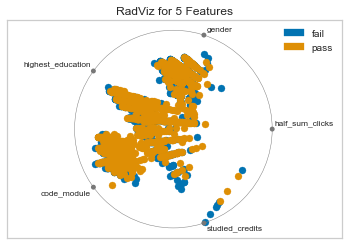

In [13]:
classes = ["fail", "pass"]
features = ["half_sum_clicks", "gender", "highest_education", "code_module", "studied_credits"]
        
sns.set_palette("colorblind")
# Instantiate the visualizer
visualizer = RadViz (
    classes=classes,
    features = features
)

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Draw the data

//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


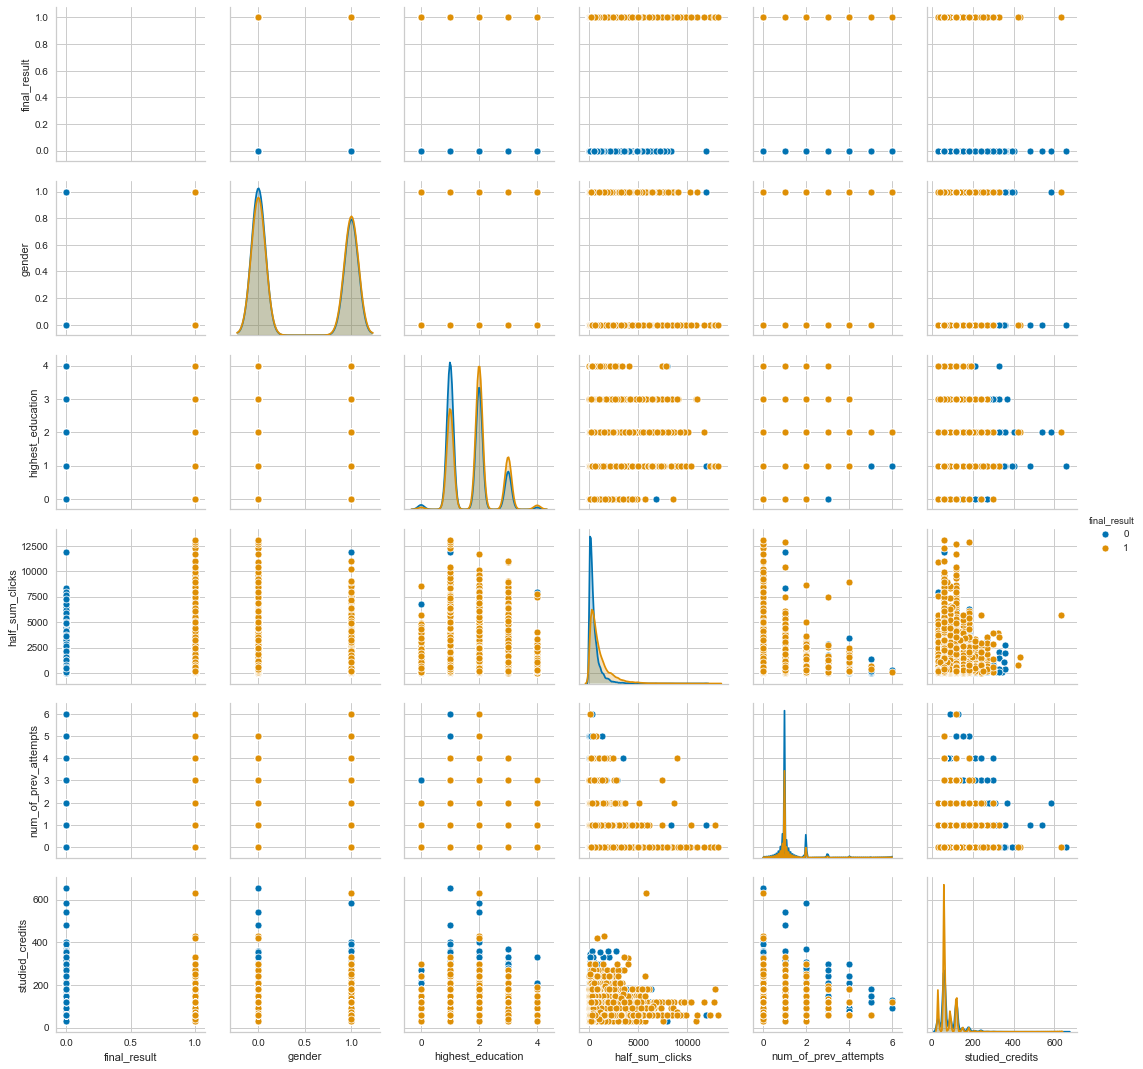

In [14]:
df_plot = df[["final_result","gender", "highest_education", "half_sum_clicks","num_of_prev_attempts", "studied_credits"]]
g = sns.pairplot(df_plot, hue="final_result")
plt.show()

In [15]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [16]:

#accuracy_score(test_y, predictions)

In [17]:
#check status of data
feature_list.head()

,code_module,module_presentation_length,num_of_prev_attempts,final_result,date_registration,disability,gender,age_band,region,highest_education,imd_band,studied_credits,b4_sum_clicks,half_sum_clicks,std_half_score
2,3.0,261,0,0,-137.0,0,0,2,2,3,3.0,90,81.0,565.0,58.166667
32,3.0,261,0,0,-74.0,0,0,0,6,1,6.0,60,8.0,347.0,35.250000
40,3.0,261,0,0,-134.0,1,1,0,1,1,3.0,60,64.0,728.0,74.958333
41,3.0,261,0,0,-190.0,0,1,1,10,3,1.0,70,24.0,305.0,52.166667
54,3.0,261,0,1,-96.0,0,0,0,7,2,8.0,60,61.0,265.0,75.416667


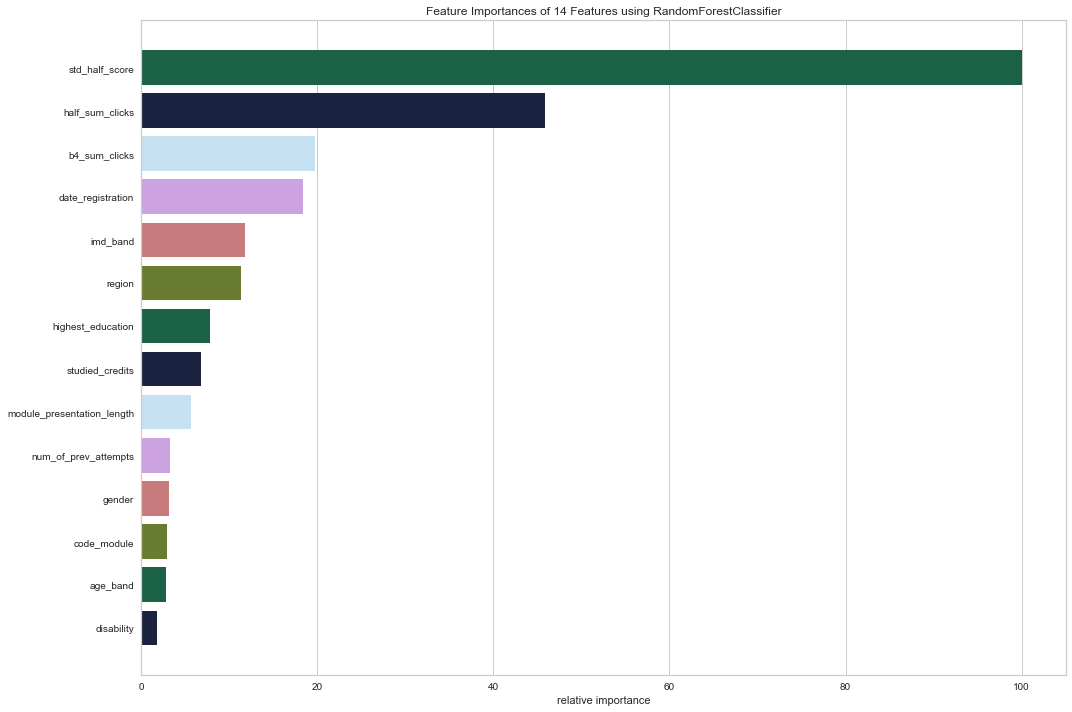

In [18]:
sns.set_palette("cubehelix")

X = feature_list[feature_list.columns.drop(['final_result'])]

y = feature_list['final_result']

model = RandomForestClassifier(n_estimators=10)
feature_list = FeatureImportances(model, size=(1080, 720))
feature_list.fit(X, y)

feature_list.show()

//anaconda3/lib/python3.7/site-packages/yellowbrick/model_selection/importances.py:195: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  YellowbrickWarning,


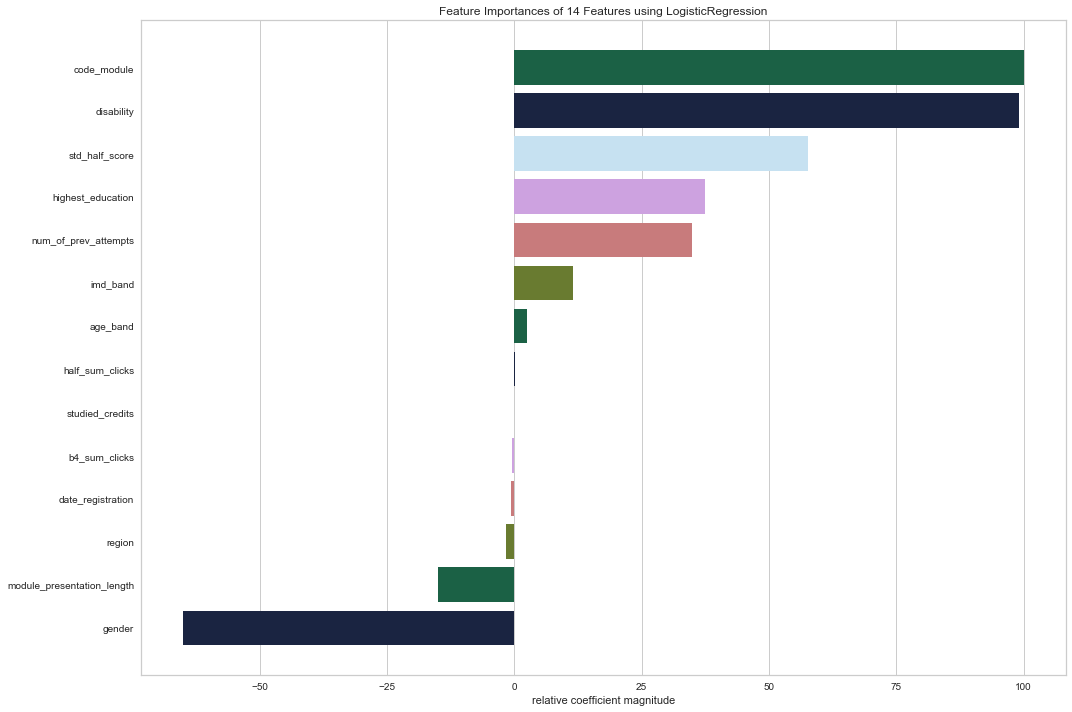

In [19]:
model = LogisticRegression()
viz = FeatureImportances(model, size=(1080, 720))

viz.fit(X, y)

viz.show()

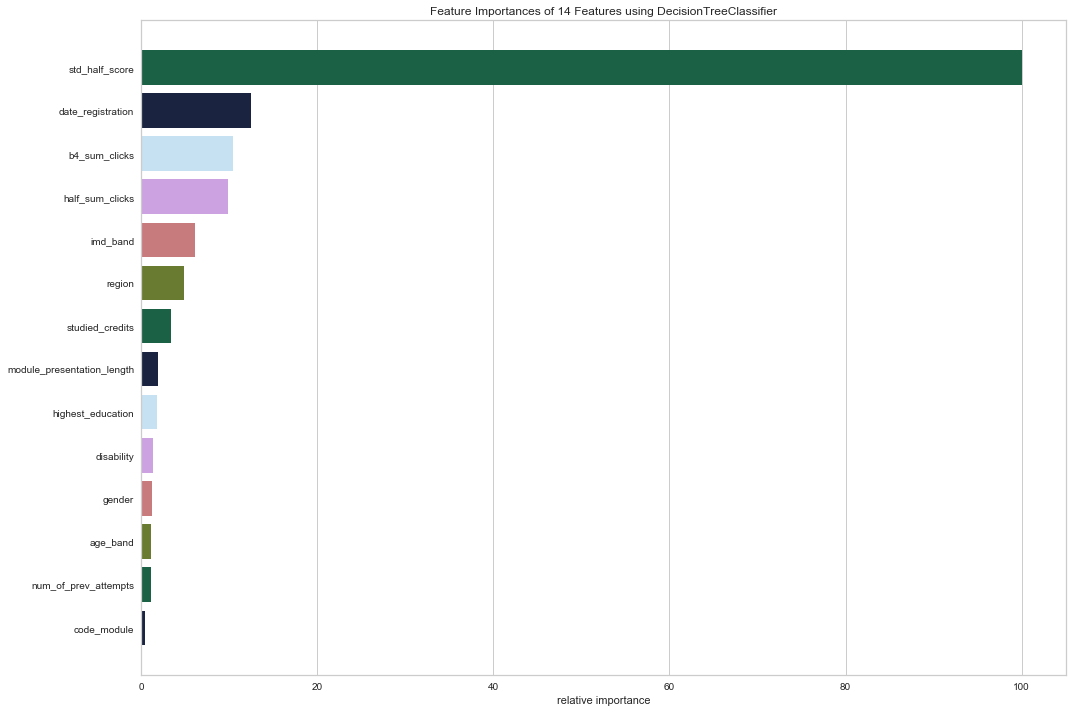

In [20]:
model = DecisionTreeClassifier()
viz = FeatureImportances(model, size=(1080, 720))

viz.fit(X, y)
viz.show()

In [21]:
feature_list = RandomForestClassifier()
feature_list.fit(X, y)
predictions = feature_list.predict(X)
    
accuracy_score(y, predictions)

0.9902699309478971

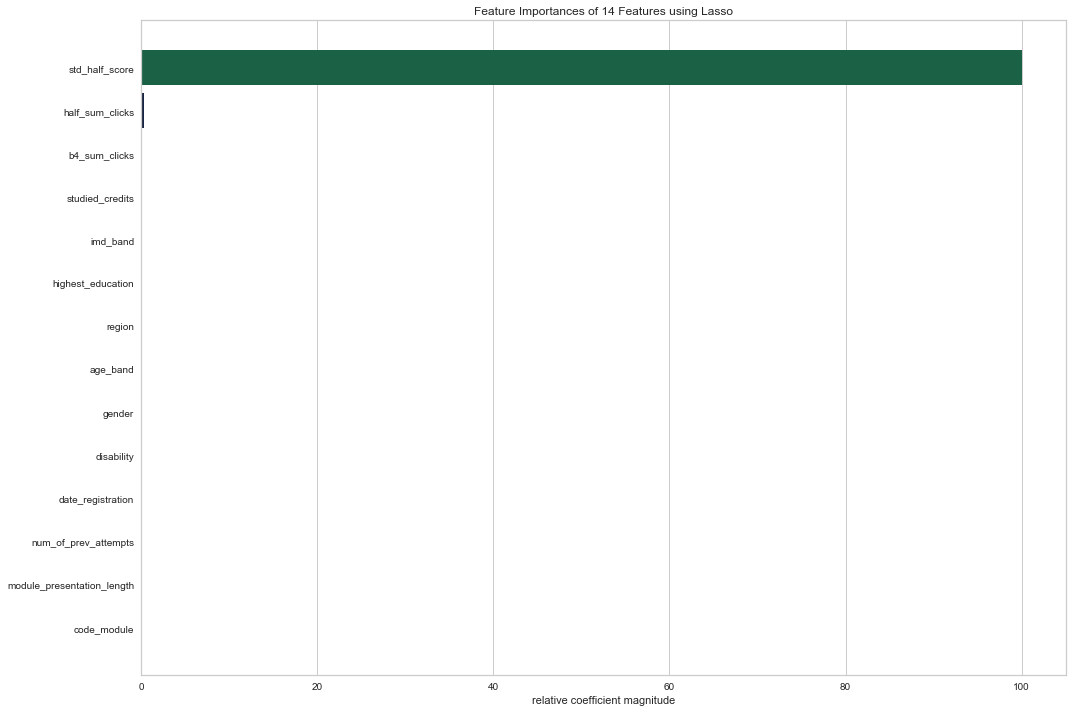

In [22]:
model = Lasso()
viz = FeatureImportances(model, size=(1080, 720))

viz.fit(X, y)
viz.show()


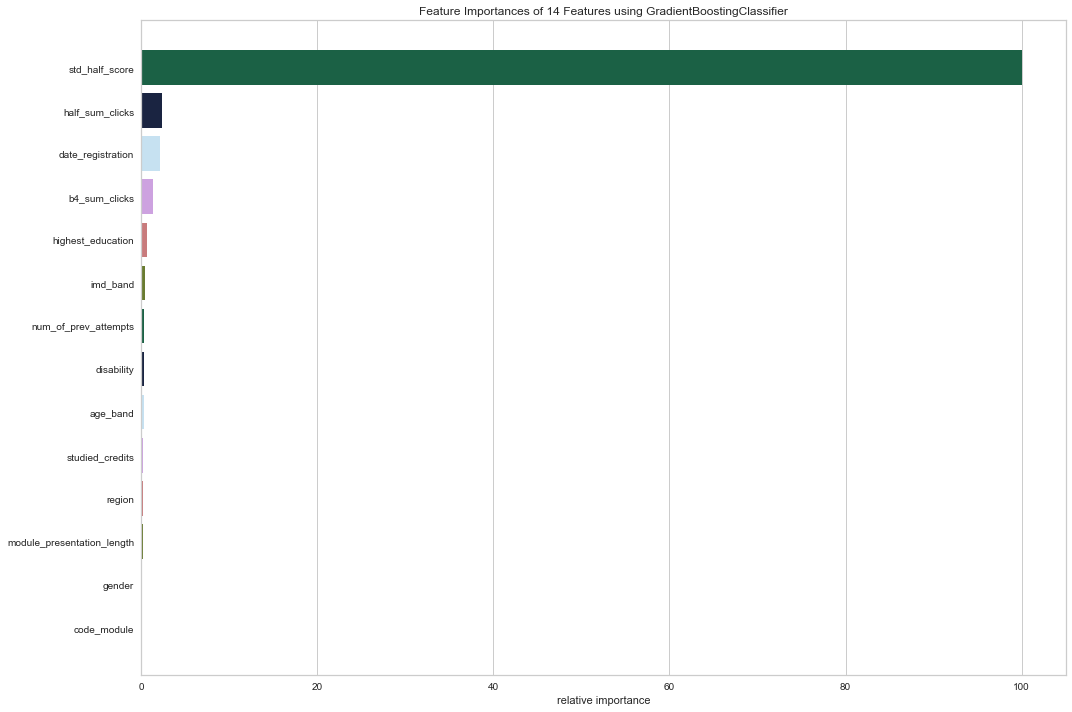

In [23]:
from sklearn.ensemble import GradientBoostingClassifier


model = GradientBoostingClassifier()
viz = FeatureImportances(model, size=(1080, 720))
viz.fit(X, y)
viz.show()

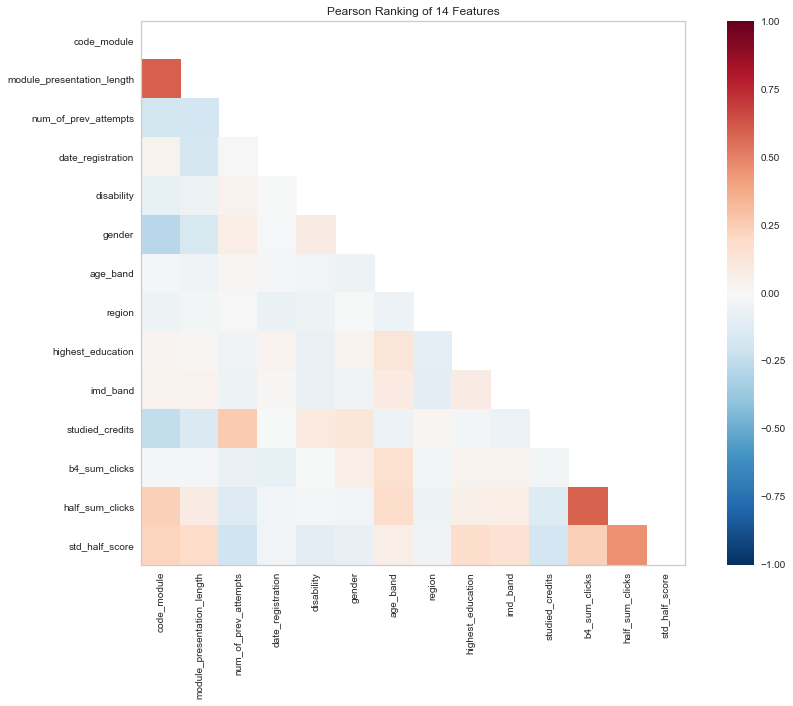

In [24]:
# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(algorithm='pearson', size=(1080, 720))

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.show()

In [25]:
#features = feature_list[feature_list.columns.drop(['final_result'])]
#label = feature_list['final_result']

//anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
//anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
//anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


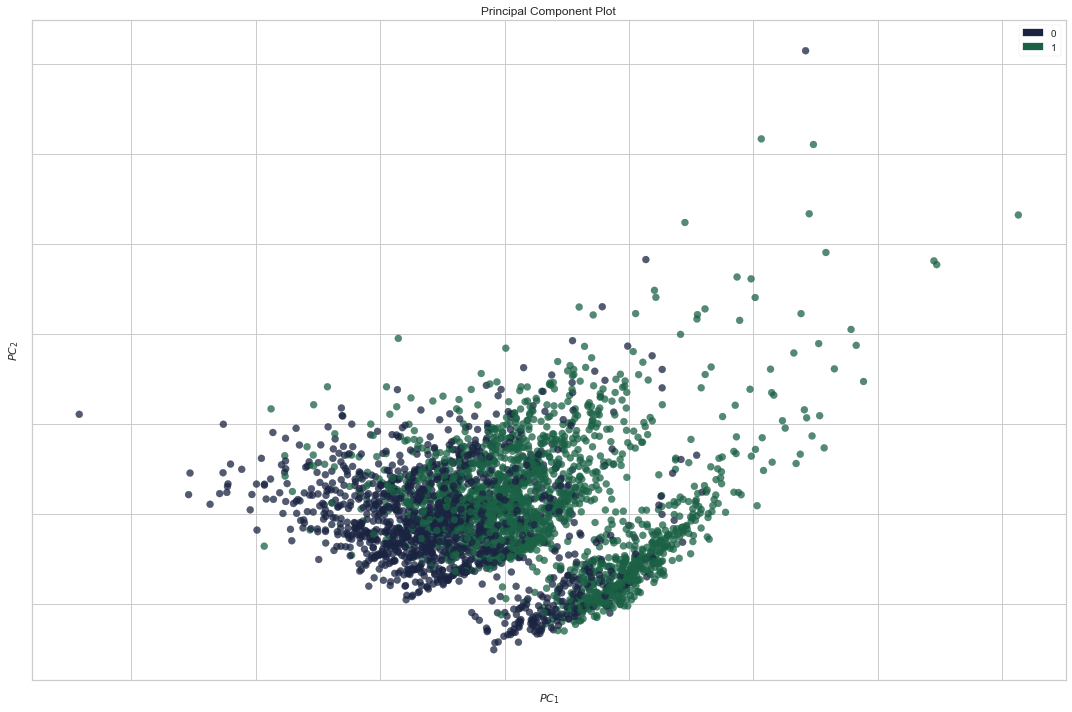

In [26]:
from yellowbrick.features.pca import PCADecomposition

# Create a list of colors to assign to points in the plot
colors = np.array(['r' if yi else 'b' for yi in y])

visualizer = PCADecomposition(
    scale=True, color=colors, size=(1080, 720)
)
visualizer.fit(X, y)
visualizer.transform(X, y)
visualizer.show()

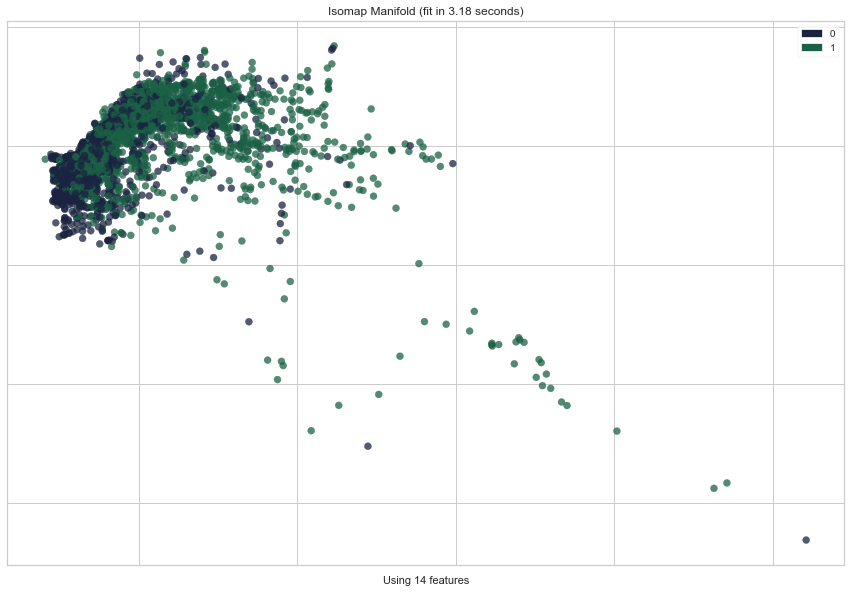

In [27]:
from yellowbrick.features.manifold import Manifold

visualizer = Manifold(
    manifold='isomap', n_neighbors=5, target='continuous', size=(1080, 720)
)
visualizer.fit(X, y)
visualizer.transform(X, y)
visualizer.show()

# Regularization Techniques

In [28]:
features = X
labels   = y

In [29]:
list(features)

['code_module',
 'module_presentation_length',
 'num_of_prev_attempts',
 'date_registration',
 'disability',
 'gender',
 'age_band',
 'region',
 'highest_education',
 'imd_band',
 'studied_credits',
 'b4_sum_clicks',
 'half_sum_clicks',
 'std_half_score']

In [30]:
model = LinearRegression()
model.fit(features, labels)
print(list(zip(features, model.coef_.tolist())))

[('code_module', 0.010869598235848068), ('module_presentation_length', 0.0013938244233516676), ('num_of_prev_attempts', 0.018803858049279754), ('date_registration', -2.729407010068546e-05), ('disability', 0.0614708058920608), ('gender', -0.009065314989754075), ('age_band', 0.006354429768865292), ('region', 0.0018738206244766575), ('highest_education', 0.015382989507859003), ('imd_band', 0.0028567993600407903), ('studied_credits', 0.00021890647758436945), ('b4_sum_clicks', -4.052799863531221e-05), ('half_sum_clicks', 1.4005815935362988e-05), ('std_half_score', 0.01250396711581719)]


In [31]:
model = Lasso()
model.fit(features, labels)
print(list(zip(features, model.coef_.tolist())))

[('code_module', 0.0), ('module_presentation_length', 0.0), ('num_of_prev_attempts', 0.0), ('date_registration', -0.0), ('disability', 0.0), ('gender', -0.0), ('age_band', 0.0), ('region', 0.0), ('highest_education', 0.0), ('imd_band', 0.0), ('studied_credits', 0.0), ('b4_sum_clicks', -0.0), ('half_sum_clicks', 3.734822274840801e-05), ('std_half_score', 0.011005165961994707)]


In [32]:
model = Ridge()
model.fit(features, labels)
print(list(zip(features, model.coef_.tolist())))

[('code_module', 0.010828422699124887), ('module_presentation_length', 0.001394504277019614), ('num_of_prev_attempts', 0.0187752290216811), ('date_registration', -2.725788270809271e-05), ('disability', 0.061243828832556), ('gender', -0.009047663354248194), ('age_band', 0.006344091202044833), ('region', 0.0018721251838832384), ('highest_education', 0.015368745607954447), ('imd_band', 0.0028556843025395492), ('studied_credits', 0.00021905972615708706), ('b4_sum_clicks', -4.0557255678688634e-05), ('half_sum_clicks', 1.401723100954995e-05), ('std_half_score', 0.01250373890384166)]


In [33]:
model = ElasticNet()
model.fit(features, labels)
print(list(zip(features, model.coef_.tolist())))

[('code_module', 0.0), ('module_presentation_length', 0.0), ('num_of_prev_attempts', 0.0), ('date_registration', -0.0), ('disability', 0.0), ('gender', -0.0), ('age_band', 0.0), ('region', 0.0), ('highest_education', 0.0), ('imd_band', 0.0), ('studied_credits', 0.0), ('b4_sum_clicks', -1.0381930063522552e-05), ('half_sum_clicks', 2.5148259468283153e-05), ('std_half_score', 0.011785008139040078)]


In [34]:
model = LogisticRegression()
model.fit(features, labels)
print(list(zip(features, model.coef_.tolist())))

[('code_module', [0.23964147970765315, -0.023542127703284628, 0.07879202421849728, -0.0011520505644647136, 0.25978321964428314, -0.12465976828175071, 0.0015802259924980195, -0.0021235496625963417, 0.05934806744409235, 0.014582198527269326, -7.327181980788785e-05, -0.0006523685621829061, 0.00015463347194750687, 0.08775259917505455])]


# Transformer Techniques

In [35]:
model = Lasso()
sfm = SelectFromModel(model)
sfm.fit(features, labels)
print(list(features.iloc[:, sfm.get_support(indices=True)]))

['half_sum_clicks', 'std_half_score']


In [36]:
model = Ridge()
sfm = SelectFromModel(model)
sfm.fit(features, labels)
print(list(features.iloc[:, sfm.get_support(indices=True)]))

['code_module', 'num_of_prev_attempts', 'disability', 'highest_education', 'std_half_score']


In [37]:
model = ElasticNet()
sfm = SelectFromModel(model)
sfm.fit(features, labels)
print(list(features.iloc[:, sfm.get_support(indices=True)]))

['std_half_score']


# Dimensionality Reduction

In [38]:
# corr = elastic_data.corr()
# plt.figure(figsize=(12, 12))
# ax = sns.heatmap(
#     corr, 
#     vmin=-1, vmax=1, center=0,
#     cmap=sns.diverging_palette(20, 220, n=200),
#     square=True
# )
# ax.set_xticklabels(
#     ax.get_xticklabels(),
#     rotation=45,
#     horizontalalignment='right'
# );

#plt.savefig('feature_correlation_heatmap.png', dpi=100)  #code to save image onto desktop

# Model Evaluation

In [39]:
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier

from yellowbrick.classifier import ClassificationReport

In [44]:
models = [
    SVC(gamma='auto'), NuSVC(gamma='auto'), LinearSVC(),
    SGDClassifier(max_iter=100, tol=1e-3), KNeighborsClassifier(),
    LogisticRegression(solver='lbfgs'), LogisticRegressionCV(cv=3),
    BaggingClassifier(), ExtraTreesClassifier(n_estimators=300),
    RandomForestClassifier(n_estimators=300)
]

In [46]:
def score_model(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
        ('one_hot_encoder', OneHotEncoder(categories = 'auto')),
        ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    model.fit(X, y, **kwargs)

    expected  = y
    predicted = model.predict(X)

    # Compute and return F1 (harmonic mean of precision and recall)
    print("{}: {}".format(estimator.__class__.__name__, f1_score(expected, predicted)))

for model in models:
    score_model(X, y, model)

SVC: 0.7261095561775289
NuSVC: 0.9751840741750749
LinearSVC: 0.9997247453894853
SGDClassifier: 0.999173781327458
KNeighborsClassifier: 0.7677248677248678
LogisticRegression: 0.9449244060475162


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//ana

LogisticRegressionCV: 1.0
BaggingClassifier: 0.9795467108899946
ExtraTreesClassifier: 1.0
RandomForestClassifier: 1.0
